In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from  marineHeatWaves import detect
import heatwavexr as hw

In [24]:
# Load required modules
import numpy as np
from datetime import date
from matplotlib import pyplot as plt


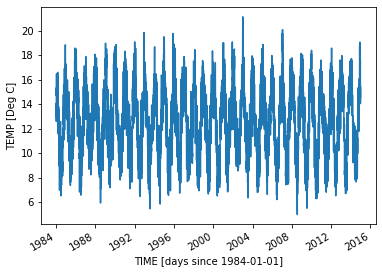

In [37]:
synthclim = hw.synthclim()
synthclim.plot()

In [26]:
%%time
orig,events = hw.mhwdetect(synthclim,smoothPercentile=False)


Wall time: 3.48 s


In [27]:
%%time
clim =hw.ts2clm(synthclim,smoothPercentile=False)

Wall time: 51 ms


In [28]:
clim

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
  * dayofyear  (dayofyear) int32 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    seas       (dayofyear) float64 16.08 16.05 16.02 16.0 ... 16.13 16.15 16.13
    thresh     (dayofyear) float64 18.03 17.99 17.88 17.79 ... 18.09 18.07 18.08

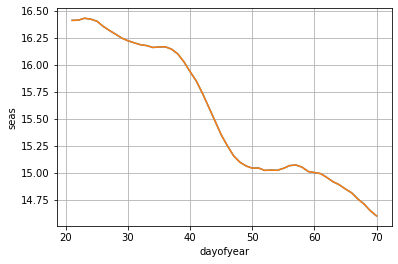

In [29]:
clim.seas[20:70].plot()
#(clim.thresh).plot(color='r',linewidth=1)
orig.seas[20:70].plot()
#(orig.thresh).plot(color='b')
plt.grid(True)
#>59

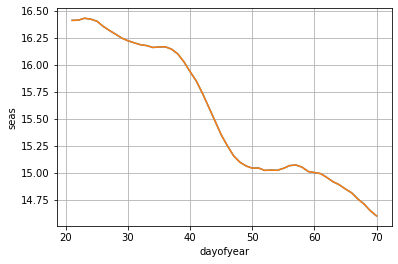

In [30]:
clim.seas[20:70].plot()
#(clim.thresh).plot(color='r',linewidth=1)
orig.seas[20:70].plot()
#(orig.thresh).plot(color='b')
plt.grid(True)
#>57

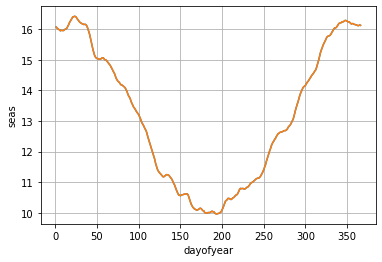

In [31]:
clim.seas.plot()
#(clim.thresh).plot(color='r',linewidth=1)
orig.seas.plot()
#(orig.thresh).plot(color='b')
plt.grid(True)

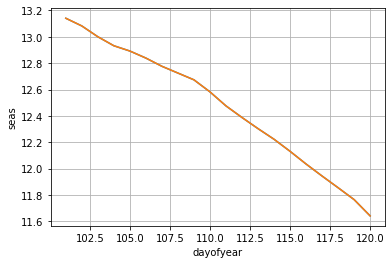

In [32]:

clim.seas[100:120].plot()
#(clim.thresh).plot(color='r',linewidth=1)
orig.seas[100:120].plot()
#(orig.thresh).plot(color='b')
plt.grid(True)

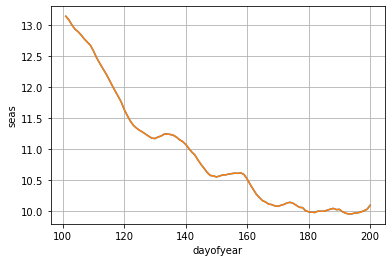

In [33]:

clim.seas[100:200].plot()
#(clim.thresh).plot(color='r',linewidth=1)
orig.seas[100:200].plot()
#(orig.thresh).plot(color='b')
plt.grid(True)

In [34]:
sc =(synthclim.groupby('dayofyear')-clim)

In [35]:
synthclim

<xarray.DataArray 'TEMP' (TIME: 11323)>
array([13.59973699, 14.08480234, 13.82454974, ..., 16.88877435,
       17.06860189, 16.71485625])
Coordinates:
  * TIME       (TIME) datetime64[ns] 1984-01-01 1984-01-02 ... 2014-12-31
    dayofyear  (TIME) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365 366
    year       (TIME) int64 1984 1984 1984 1984 1984 ... 2014 2014 2014 2014
Attributes:
    units:    Deg C

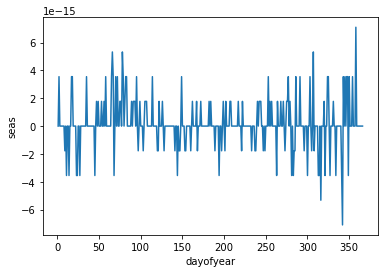

In [36]:
(clim.seas-orig.seas).plot()

Text(0, 0.5, 'SST [$^\\circ$C]')

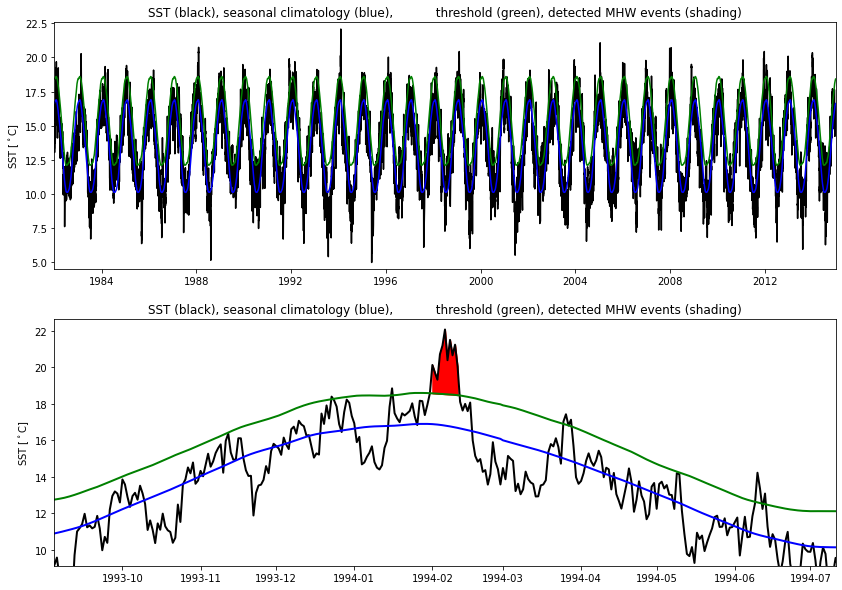

In [506]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
# Plot SST, seasonal cycle, and threshold
plt.plot(dates, sst, 'k-')
plt.plot(dates, clim['thresh'], 'g-')
plt.plot(dates, clim['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(dates[0], dates[-1])
plt.ylim(sst.min()-0.5, sst.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')
plt.subplot(2,1,2)
# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-10, ev+11, 1):
    t1 = np.where(t==mhws['time_start'][ev0])[0][0]
    t2 = np.where(t==mhws['time_end'][ev0])[0][0]
    plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))
# Find indices for MHW of interest and shade accordingly
t1 = np.where(t==mhws['time_start'][ev])[0][0]
t2 = np.where(t==mhws['time_end'][ev])[0][0]
plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                 color='r')
# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, sst, 'k-', linewidth=2)
plt.plot(dates, clim['thresh'], 'g-', linewidth=2)
plt.plot(dates, clim['seas'], 'b-', linewidth=2)
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(date.fromordinal(mhws['time_start'][ev]-150), date.fromordinal(mhws['time_end'][ev]+150))
plt.ylim(clim['seas'].min() - 1, clim['seas'].max() + mhws['intensity_max'][ev] + 0.5)
plt.ylabel(r'SST [$^\circ$C]')